In [23]:
"""
A. For each tissue, enrichment [how likely are eSTRs to fall in TF sites]
Fisher test at each tissue
    Background: All STRs
    Forground: eSTRs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn as sns

#variables

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys())])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'

In [29]:
"""choose feature between [ 'eSTRs', 'Causal', 'NonCausal']"""

feature='Causal' 

feat_file = 'tfbs_%s_enrich.tab'%feature
#open files        ##tfbs Encode Lung     #Background : All STRs

# Cont. Table by Tissues
TFs ='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/enrichment/'
transfacts = os.listdir(TFs)
transfacts = [x for x in transfacts if feat_file in x]

# Fisher test at tissues
DATA=[]
ODD =[]
for i in range (len(TISSUES)):
    # Data
    tis = TISSUES[i]
    data = pd.read_csv(TFs+tis+'_%s'%feat_file, sep='\t')       #just Feature  
    data = data.loc[data['AB']>=50].copy()    #remove those with not enough data
    data = data.loc[data['AA']>0].copy()    #remove those with no causal (oddsratio will be =0)
    data['P.'+SHORTEN[tis]] = -np.log10(data['pval'])
    data['Odd.'+SHORTEN[tis]] = -np.log2(data['oddsratio'])
    #pvalues in tissue
    PV = data[['category','P.'+SHORTEN[tis]]]   
    DATA.append(PV)
    #odd ratios
    ODD.append(data[['category','Odd.'+SHORTEN[tis]]])
    
pdata=PV
oddpdata = data[['category','Odd.'+SHORTEN[tis]]]

for i in range (len(TISSUES)-1,-1,-1):
    #print(TISSUES[i], DATA[i].columns)
    pdata = pd.merge(pdata, DATA[i], on='category', how='outer')  
    oddpdata = pd.merge(oddpdata, ODD[i], on='category', how='outer')
       
pdata.shape

(176, 19)

In [ ]:
  Cell lines
        GM12878 ***   
        A549       
        OCI-LY7    
        HL-60        
        NB4    

In [31]:
#Choose cell type
    #Restrict to GM cell line
Cell = [x for x in list(pdata['category']) if 'GM12878' in x]

pdata = pdata.loc[pdata['category'].isin(Cell)].copy()
oddpdata = oddpdata.loc[oddpdata['category'].isin(Cell)].copy()
oddpdata.index=[x.split('_')[0] for x in list(oddpdata['category'])]

#Order by enrichment level
pdata['p.Enrichment'] = pdata.sum(axis=1)
oddpdata['odd.Enrichment'] = oddpdata.sum(axis=1)
pdata = pdata.sort_values('p.Enrichment', ascending=False)
oddpdata = oddpdata.sort_values('odd.Enrichment',ascending=False)
pdata.index=[x.split('_')[0] for x in list(pdata['category'])]

del pdata['category']
del pdata['p.Enrichment']

del oddpdata['category']
del oddpdata['odd.Enrichment']

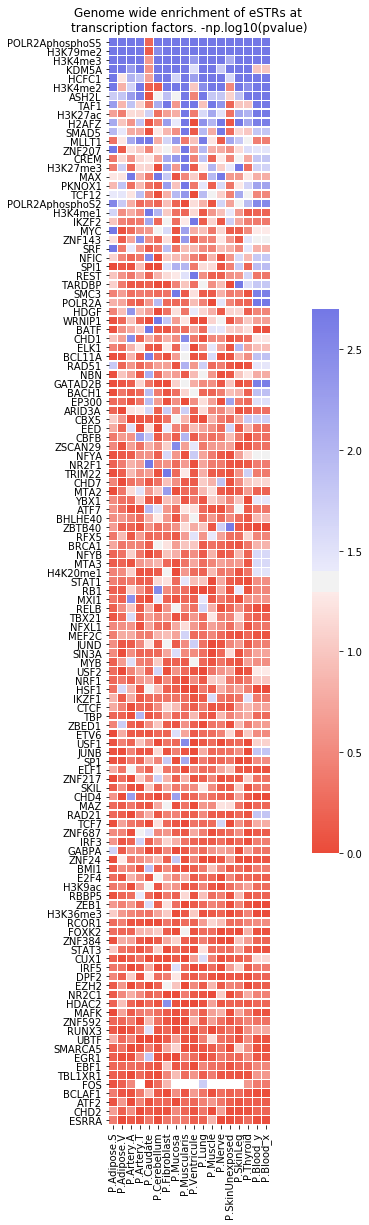

In [28]:
fig, ax = plt.subplots(figsize=(15, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.7, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata.columns), 
           yticklabels=[x for x in list(pdata.index)])
plt.title('Genome wide enrichment of causal eSTRs at \ntranscription factors. -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()

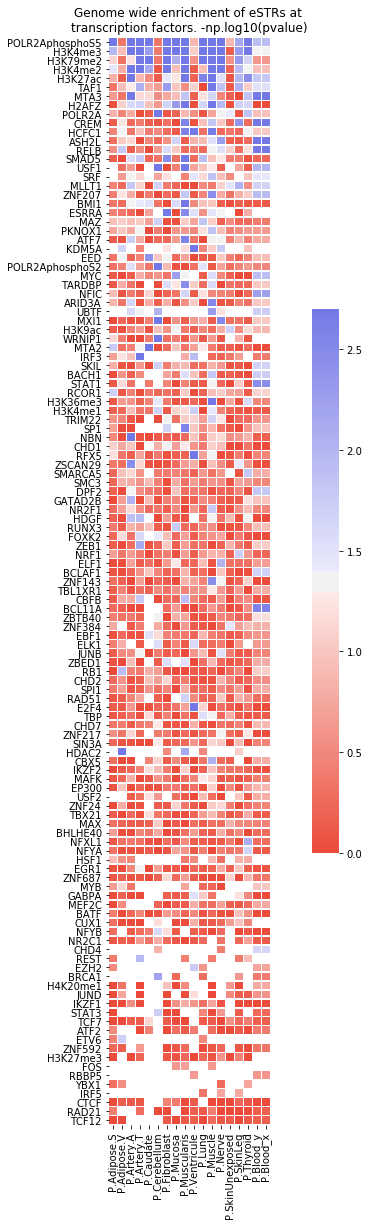

In [32]:
fig, ax = plt.subplots(figsize=(15, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=2.7, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=list(pdata.columns), 
           yticklabels=[x for x in list(pdata.index)])
plt.title('Genome wide enrichment of eSTRs at \ntranscription factors. -np.log10(pvalue)')
ax.invert_xaxis()
plt.show()